# COURSE: PCA and multivariate neural signal processing
## SECTION: Dimension reduction with PCA
### VIDEO: Python: PCA of real data
#### Instructor: sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import copy
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
from pytopo import topoplotIndie

In [6]:
# mat file containing EEG, leadfield and channel locations
matfile = sio.loadmat('MATLAB_data_files/sampleEEGdata')
EEG = matfile['EEG'][0,0]
EEG['times'] = EEG['times'][0]

In [7]:
## compute PCA on ERP

erp = np.mean(EEG['data'],axis=2)
data = copy.deepcopy(erp)

# mean-center and covariance matrix
for ci in range(int(EEG['nbchan'])):
    data[ci,:] -= np.mean(data[ci,:])

covd = data@data.T / (int(EEG['pnts'])-1)

# eigendecomposition
evals,evecs = np.linalg.eig( covd )

# sort according to eigenvalues
soidx = np.argsort(evals)
soidx = soidx[::-1]
evals = evals[soidx]
evecs = evecs[:,soidx]

# convert eigenvalues to %change
evals = 100*evals / np.sum(evals)


# principal component time series
pc_timeseries = evecs[:,0].T @ erp


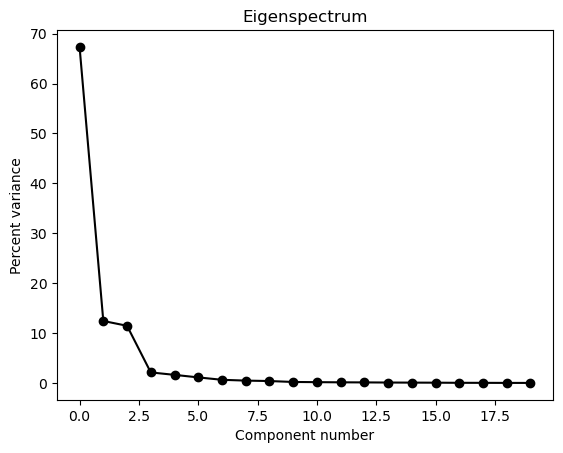

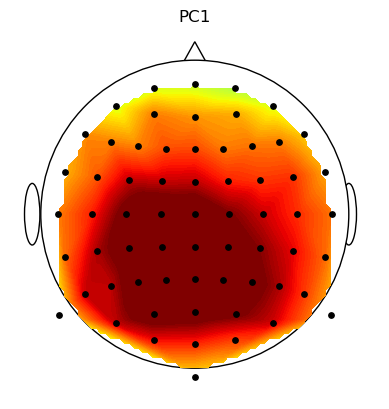

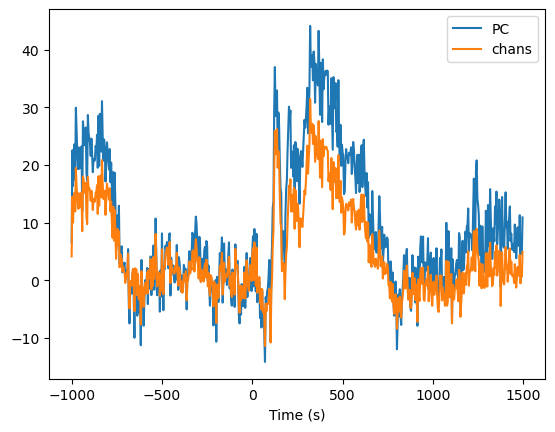

In [8]:
## plot results and compare with electrode

# eigenspectrum
plt.plot(evals[:20],'ko-')
plt.title('Eigenspectrum')
plt.ylabel('Percent variance')
plt.xlabel('Component number')
plt.show()

# topographical map of first eigenvector
topoplotIndie(evecs[:,0],EEG['chanlocs'],'PC1')
plt.show()

# plot time series
plt.plot(EEG['times'],pc_timeseries,label='PC')
plt.plot(EEG['times'],np.mean(erp[[19,32,20],:],axis=0)*5,label='chans')
plt.legend()
plt.xlabel('Time (s)')
plt.show()